In [3]:
# Every notebook
# Automatic reloading & inline plotting
#
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
# This file contains all the main external libs we'll use
from fastai.imports import *

In [5]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [6]:
PATH = "data/dogscats/"
sz=224

In [7]:
torch.cuda.is_available()


True

In [8]:
torch.backends.cudnn.enabled

True

In [9]:
os.listdir(PATH)

['valid', 'sample', 'models', 'test1', 'train']

In [10]:
os.listdir(f'{PATH}valid')

['dogs', 'cats']

In [11]:
files = os.listdir(f'{PATH}valid/cats')[:5]
files

['cat.10787.jpg',
 'cat.603.jpg',
 'cat.4780.jpg',
 'cat.1676.jpg',
 'cat.1461.jpg']

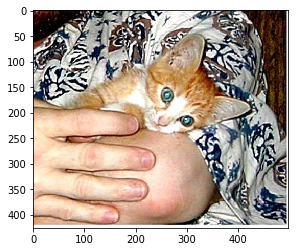

In [12]:
img = plt.imread(f'{PATH}valid/cats/{files[0]}')
plt.imshow(img);

In [13]:
img.shape

(426, 499, 3)

In [14]:
img[:4,:4]

array([[[106,  50,  13],
        [110,  56,  18],
        [115,  61,  25],
        [106,  56,  19]],

       [[103,  47,  12],
        [106,  52,  16],
        [105,  51,  15],
        [ 94,  44,   9]],

       [[ 98,  42,   9],
        [ 96,  42,   8],
        [ 86,  32,   0],
        [ 72,  22,   0]],

       [[ 91,  34,   4],
        [ 85,  30,   0],
        [ 68,  15,   0],
        [ 58,   7,   0]]], dtype=uint8)

In [15]:
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 2)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:06<00:00, 14373639.74it/s]


100%|██████████| 32/32 [00:47<00:00,  1.49s/it]


HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                     
    0      0.044288   0.029027   0.98877   
    1      0.037448   0.030339   0.987793                     



[0.030338608, 0.98779296875]

In [16]:
data.val_y


array([0, 0, 0, ..., 1, 1, 1])

In [17]:
data.classes

['cats', 'dogs']

In [18]:
log_preds = learn.predict()
log_preds.shape

(2000, 2)

In [19]:
log_preds[:10]

array([[ -0.00035,  -7.94564],
       [ -0.00002, -10.82146],
       [ -0.0573 ,  -2.88795],
       [ -0.00009,  -9.36619],
       [ -0.00024,  -8.32419],
       [ -0.00045,  -7.69678],
       [ -0.00004, -10.10391],
       [ -0.00003, -10.40929],
       [ -0.00007,  -9.55334],
       [ -0.00003, -10.28315]], dtype=float32)

In [20]:
preds = np.argmax(log_preds, axis=1)

In [21]:
preds = np.argmax(log_preds, axis=1)
probs = np.exp(log_preds[:,1])  

In [22]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], 4, replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

In [23]:
def plot_val_with_title(idxs, title):
    imgs = np.stack([data.val_ds[x][0] for x in idxs])
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(data.val_ds.denorm(imgs), rows=1, titles=title_probs)

In [24]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [25]:
def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

SyntaxError: unexpected EOF while parsing (<ipython-input-25-23395e6799bd>, line 7)

In [26]:
def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

In [27]:
def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

Correctly classified


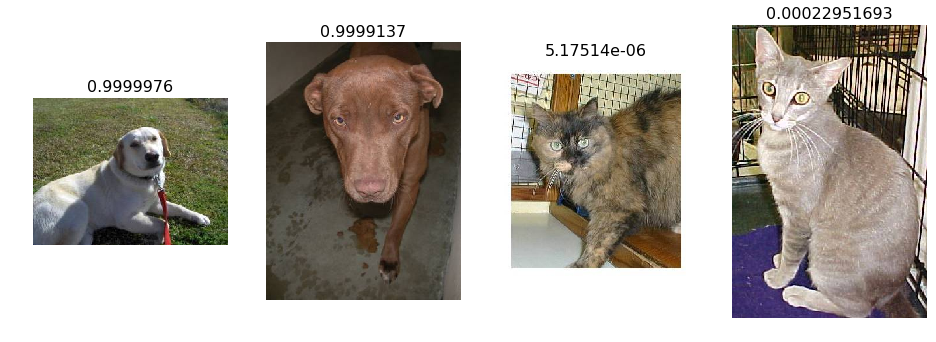

In [28]:
plot_val_with_title(rand_by_correct(True), "Correctly classified")

Correctly classified


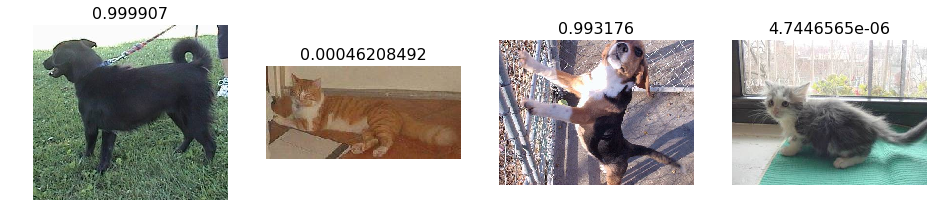

In [29]:
plot_val_with_title(rand_by_correct(True), "Correctly classified")

Incorrectly classified


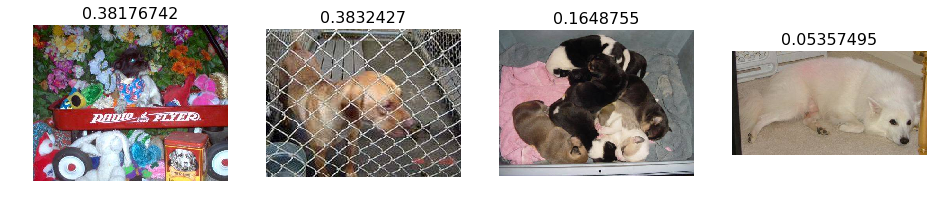

In [30]:
plot_val_with_title(rand_by_correct(False), "Incorrectly classified")

In [31]:
def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask(((preds == data.val_y)==is_correct) & (data.val_y == y), mult)

Most correct cats


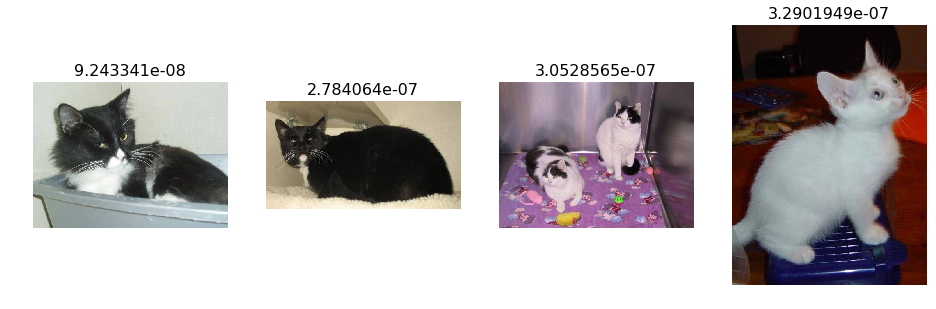

In [32]:
plot_val_with_title(most_by_correct(0, True), "Most correct cats")

Most correct cats


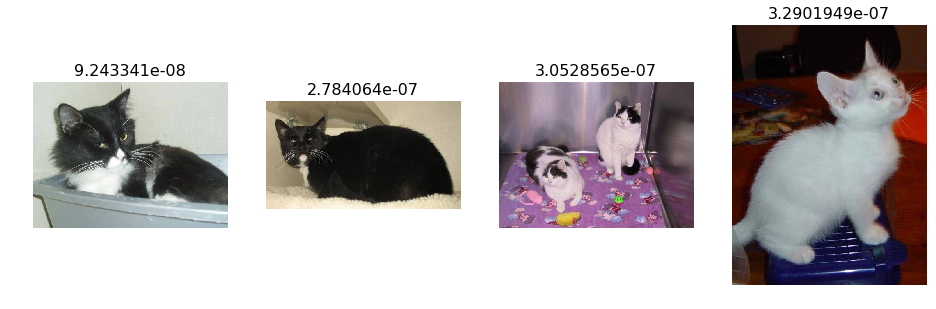

In [33]:
plot_val_with_title(most_by_correct(0, True), "Most correct cats")

Most correct dogs


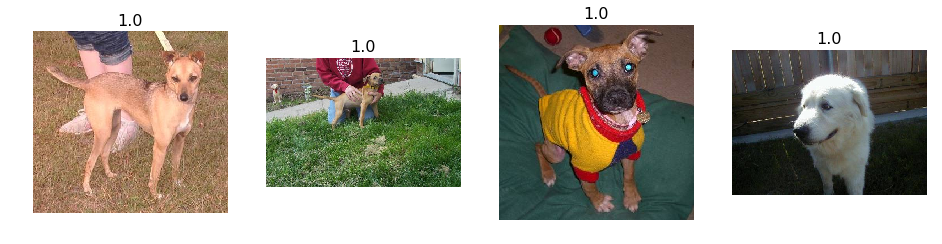

In [34]:
plot_val_with_title(most_by_correct(1, True), "Most correct dogs")

Most correct dogs


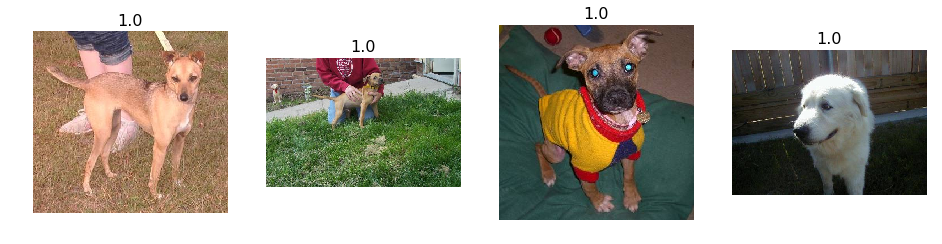

In [35]:
plot_val_with_title(most_by_correct(1, True), "Most correct dogs")

Most uncertain predictions


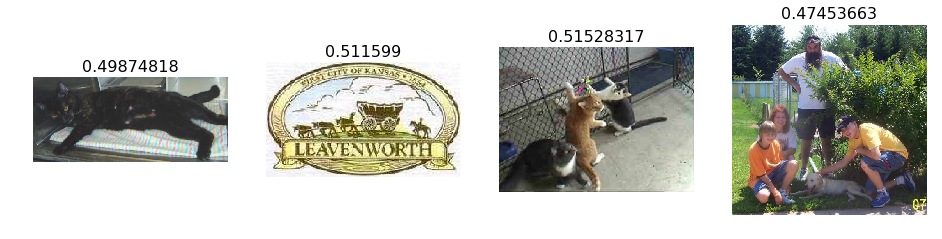

In [36]:
most_uncertain = np.argsort(np.abs(probs -0.5))[:4]
plot_val_with_title(most_uncertain, "Most uncertain predictions")

In [37]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [38]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [39]:
learn.sched.plot_lr()

AttributeError: 'NoneType' object has no attribute 'plot_lr'

In [40]:
learn.sched.plot()

AttributeError: 'NoneType' object has no attribute 'plot'

In [41]:
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

In [42]:
def get_augs():
    data = ImageClassifierData.from_paths(PATH, bs=2, tfms=tfms, num_workers=1)
    x,_ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[1]

In [43]:
ims = np.stack([get_augs() for i in range(6)])

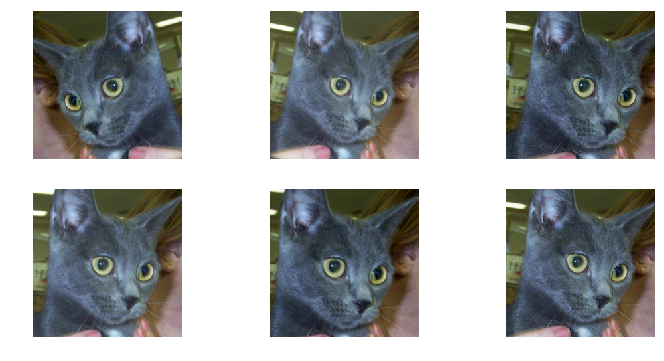

In [44]:
plots(ims, rows=2)

In [45]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [46]:
learn.fit(1e-2, 1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                     
    0      0.050166   0.029172   0.990234  



[0.029172279, 0.990234375]

In [47]:
learn.precompute=False

In [48]:
learn.fit(1e-2, 3, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                     
    0      0.048714   0.028685   0.989258  
    1      0.038406   0.029057   0.989258                     
    2      0.039619   0.025785   0.990723                     



[0.025784975, 0.99072265625]

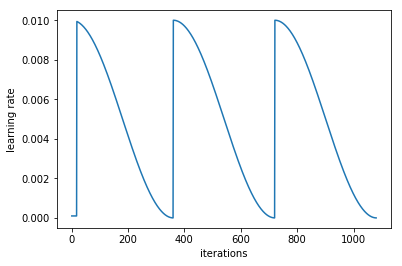

In [49]:
learn.sched.plot_lr()

In [50]:
learn.save('224_lastlayer')

In [51]:
learn.load('224_lastlayer')